# Update a Registered Model

Registering a model with the minimum information.

In [1]:
import mlflow
from mlflow_for_ml_dev.src.utils.folder_operations import get_project_root

# set mlflow tracking uri
mlflow.set_tracking_uri(uri=(get_project_root() / 'mlruns').as_uri())

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Instantiate a model
rfc = RandomForestClassifier()

registered_model_name = "random-forest-classifier"
with mlflow.start_run(run_name="registering-model") as run:
    # Log the model
    mlflow.sklearn.log_model(sk_model = rfc, artifact_path = rfc.__class__.__name__, registered_model_name=registered_model_name)   

2025/03/09 10:32:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'random-forest-classifier'.
Created version '1' of model 'random-forest-classifier'.


## Adding Model Description

In [4]:
client = mlflow.MlflowClient()

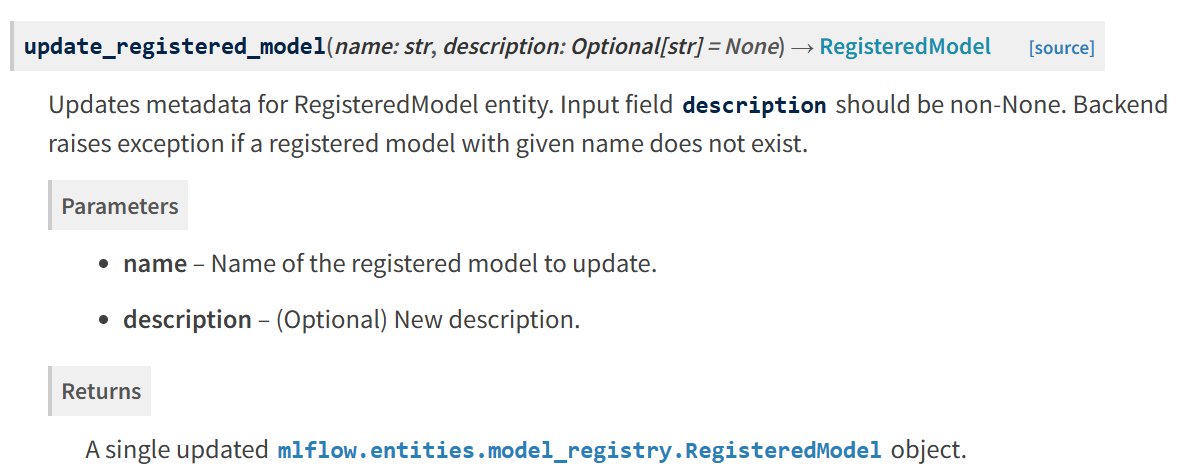

In [5]:
client.update_registered_model(name = registered_model_name, description="This is a random forest classifier model")

<RegisteredModel: aliases={}, creation_timestamp=1741534327101, description='This is a random forest classifier model', last_updated_timestamp=1741534327166, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1741534327107, current_stage='None', description=None, last_updated_timestamp=1741534327107, name='random-forest-classifier', run_id='aeed54e00a304936a4defc509dffbf48', run_link=None, source='file:///C:/Users/manue/projects/mlflow_for_ml_dev/mlruns/0/aeed54e00a304936a4defc509dffbf48/artifacts/RandomForestClassifier', status='READY', status_message=None, tags={}, user_id=None, version=1>], name='random-forest-classifier', tags={}>

## Adding Model Tags

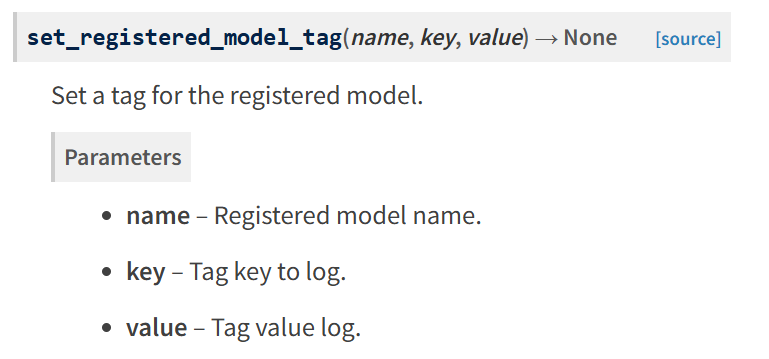

In [6]:
registered_model_tags = {
    "project_name":"UNDEFINED",
    "task":"classification",
    "framework":"sklearn",
}

for key, value in registered_model_tags.items():
    
    client.set_registered_model_tag(name=registered_model_name, key=key, value=value)

## Set Model Alias

In [7]:
model_aliases = ["Champion", "Candidate","Development"]

for model_alias in model_aliases:
    client.set_registered_model_alias(name=registered_model_name, alias = model_alias, version="1")


### Creating a new version

In [8]:
# Instantiate a model
rfc = RandomForestClassifier()

with mlflow.start_run(run_name="registering-model") as run:
    # Log the model
    mlflow.sklearn.log_model(sk_model = rfc, artifact_path = rfc.__class__.__name__, registered_model_name=registered_model_name)   

2025/03/09 10:33:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'random-forest-classifier' already exists. Creating a new version of this model...
Created version '2' of model 'random-forest-classifier'.


In [9]:
# Set the alias to "Champion" for the new version of the model. 
# An alias can only be set to one version of a model at a time.
client.set_registered_model_alias(name=registered_model_name, alias = "Champion", version="2")